WORLD HAPPINESS REPORT PROJECT

- Import necessary libraries

This is a regression problem, so we will be importing regression libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
from xgboost import XGBRegressor

Import dataset from GitHub

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Now, we can begin analysing our dataset:

- Check shape
- General Info
- Stats
- Null Values
- Duplicates

In [4]:
df.shape

(158, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
df.drop_duplicates(inplace = True)
df.shape

(158, 12)

From above analysis, we can note:
- There are 158 unique rows with 12 columns
- There are no null values
- There is skewness in data (high SD wrt Mean)
- There are unnecessary columns in dataset (Country, Rank)

Before moving further, we need to encode the categorical column - region
I will be using get_dummies for this

In [9]:
categorical_columns = ['Region']
df1 = pd.get_dummies(df[categorical_columns],drop_first=True)
df1

,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
153,0,0,0,0,0,0,0,1,0
154,0,0,0,0,0,0,0,1,0
155,0,0,0,1,0,0,0,0,0
156,0,0,0,0,0,0,0,1,0


In [10]:
df = df.join(df1)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Dystopia Residual,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,0,0,0,0,0,0,0,0,1
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,2.70201,0,0,0,0,0,0,0,0,1
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,2.49204,0,0,0,0,0,0,0,0,1
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,2.46531,0,0,0,0,0,0,0,0,1
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2.45176,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,...,0.67042,0,0,0,0,0,0,0,1,0
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,...,1.63328,0,0,0,0,0,0,0,1,0
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,...,0.32858,0,0,0,1,0,0,0,0,0
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,...,1.83302,0,0,0,0,0,0,0,1,0


Now, we can drop the original Region column along with 'Country' and 'Happiess Rank' columns are they are of no use to us

In [11]:
df.drop(columns = categorical_columns,axis=1,inplace = True)
df

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,1
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,1
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,1
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,1
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,0,0,0,0,0,0,0,1,0
154,Benin,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,0,0,0,0,0,0,0,1,0
155,Syria,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0,0,0,1,0,0,0,0,0
156,Burundi,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,0,0,0,0,0,0,0,1,0


In [12]:
df.drop(columns = ['Country','Happiness Rank'], axis=1,inplace = True)
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,1
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,1
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,1
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,1
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,0,0,0,0,0,0,0,1,0
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,0,0,0,0,0,0,0,1,0
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0,0,0,1,0,0,0,0,0
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,0,0,0,0,0,0,0,1,0


Now, that we have encoded our categorical column and removed unnecessary columns, we can begin visualizing our dataset

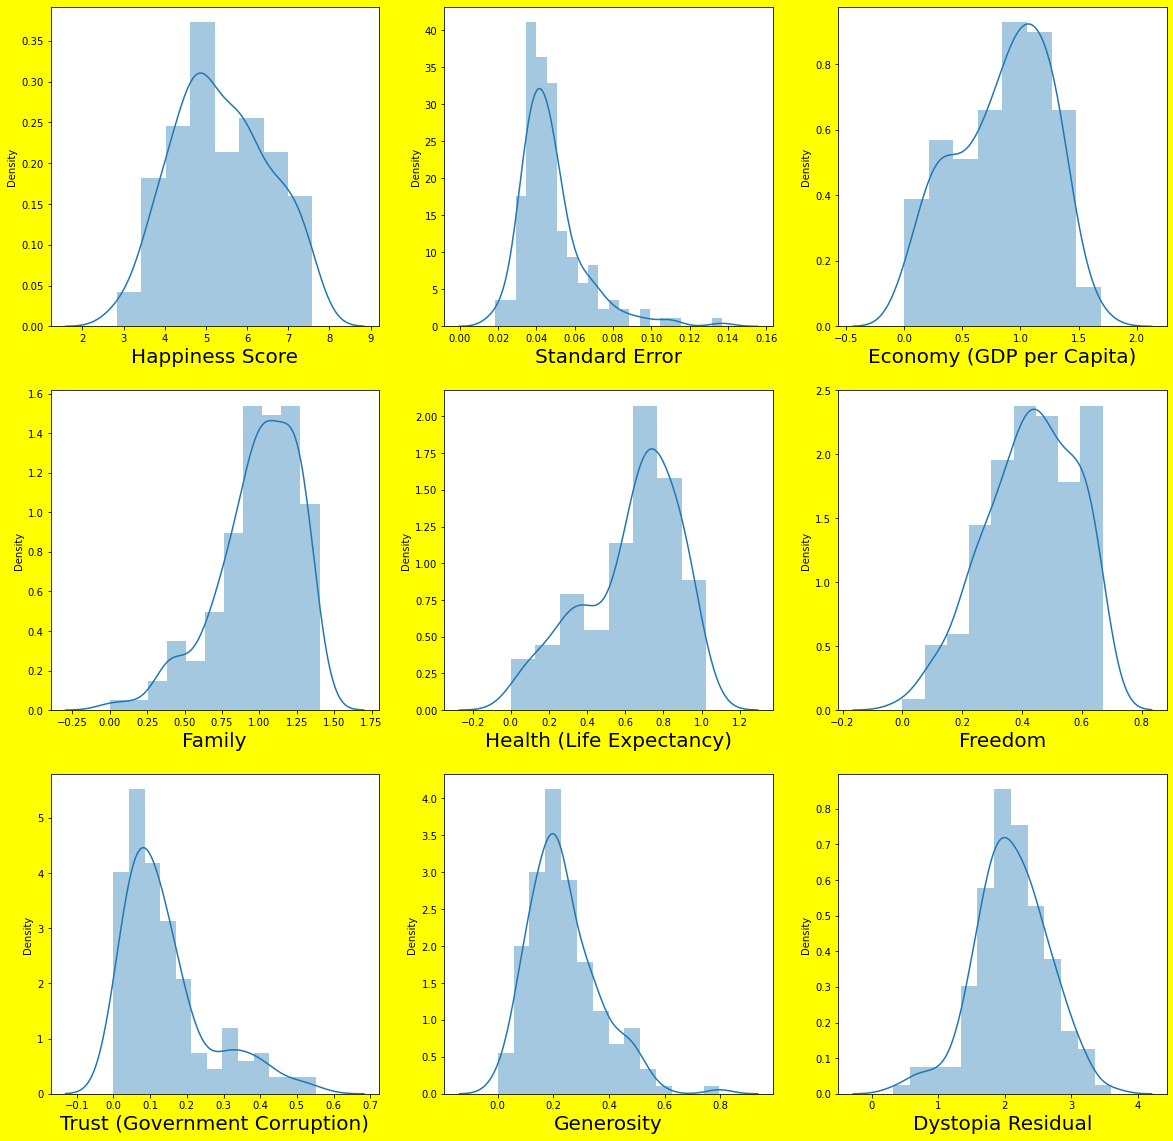

In [13]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Our dataset does not seem very skewed, so we can move on to checing the correlation using heatmap

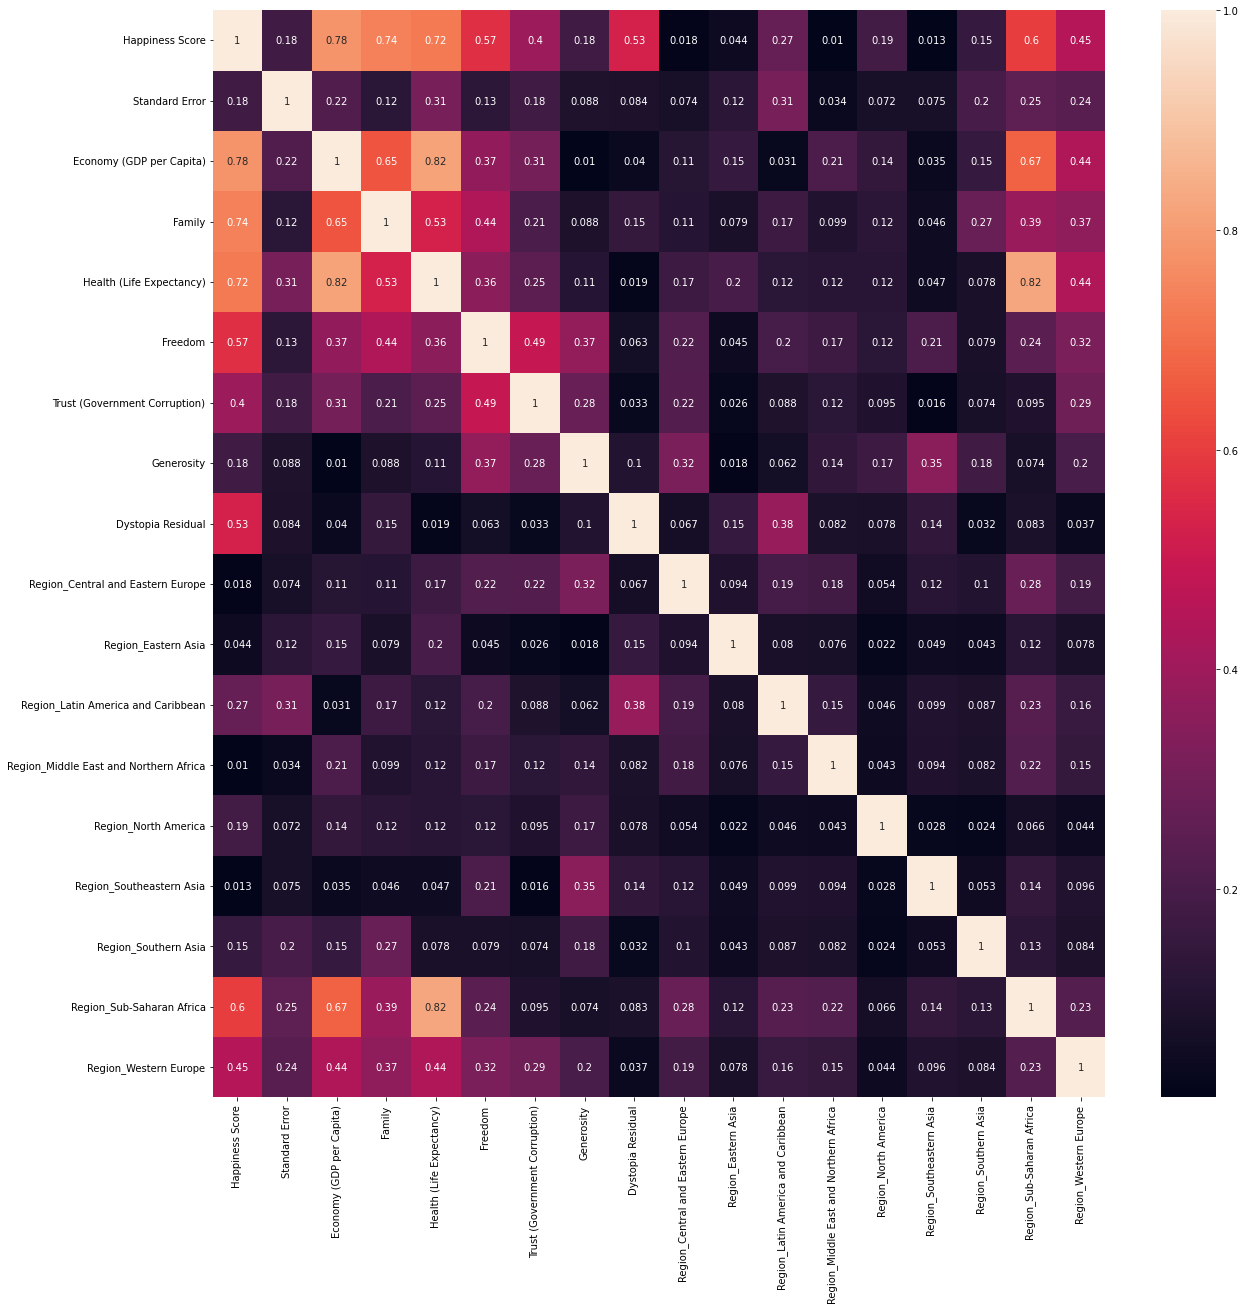

In [14]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

We can note, there is high collinearity between Economy Health, Sub-Saharan Africa and Health

We can check Scatter plot for further analysis

<function matplotlib.pyplot.show(close=None, block=None)>

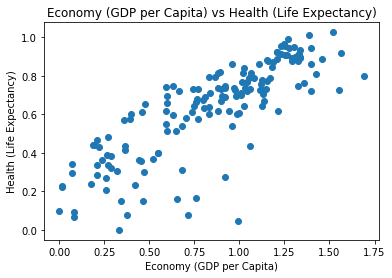

In [15]:
plt.scatter(df['Economy (GDP per Capita)'], df['Health (Life Expectancy)'])
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Health (Life Expectancy)')
plt.title('Economy (GDP per Capita) vs Health (Life Expectancy)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

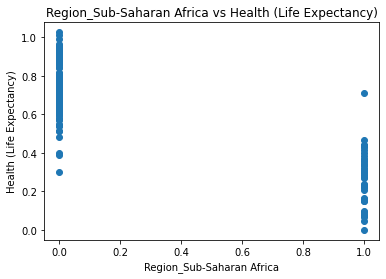

In [16]:
plt.scatter(df['Region_Sub-Saharan Africa'], df['Health (Life Expectancy)'])
plt.xlabel('Region_Sub-Saharan Africa')
plt.ylabel('Health (Life Expectancy)')
plt.title('Region_Sub-Saharan Africa vs Health (Life Expectancy)')
plt.show

We can note, there is a good correlation between Economy and Health but not enough to delete either column

We can move on to seperating Target and Feature columns

In [17]:
x = df.drop(columns = ['Happiness Score'])
y = df['Happiness Score']

In [18]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,1
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,1
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,1
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,1
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,0,0,0,0,0,0,0,1,0
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,0,0,0,0,0,0,0,1,0
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0,0,0,1,0,0,0,0,0
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,0,0,0,0,0,0,0,1,0


In [19]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

Check Scatter Plot to again see relation with Target

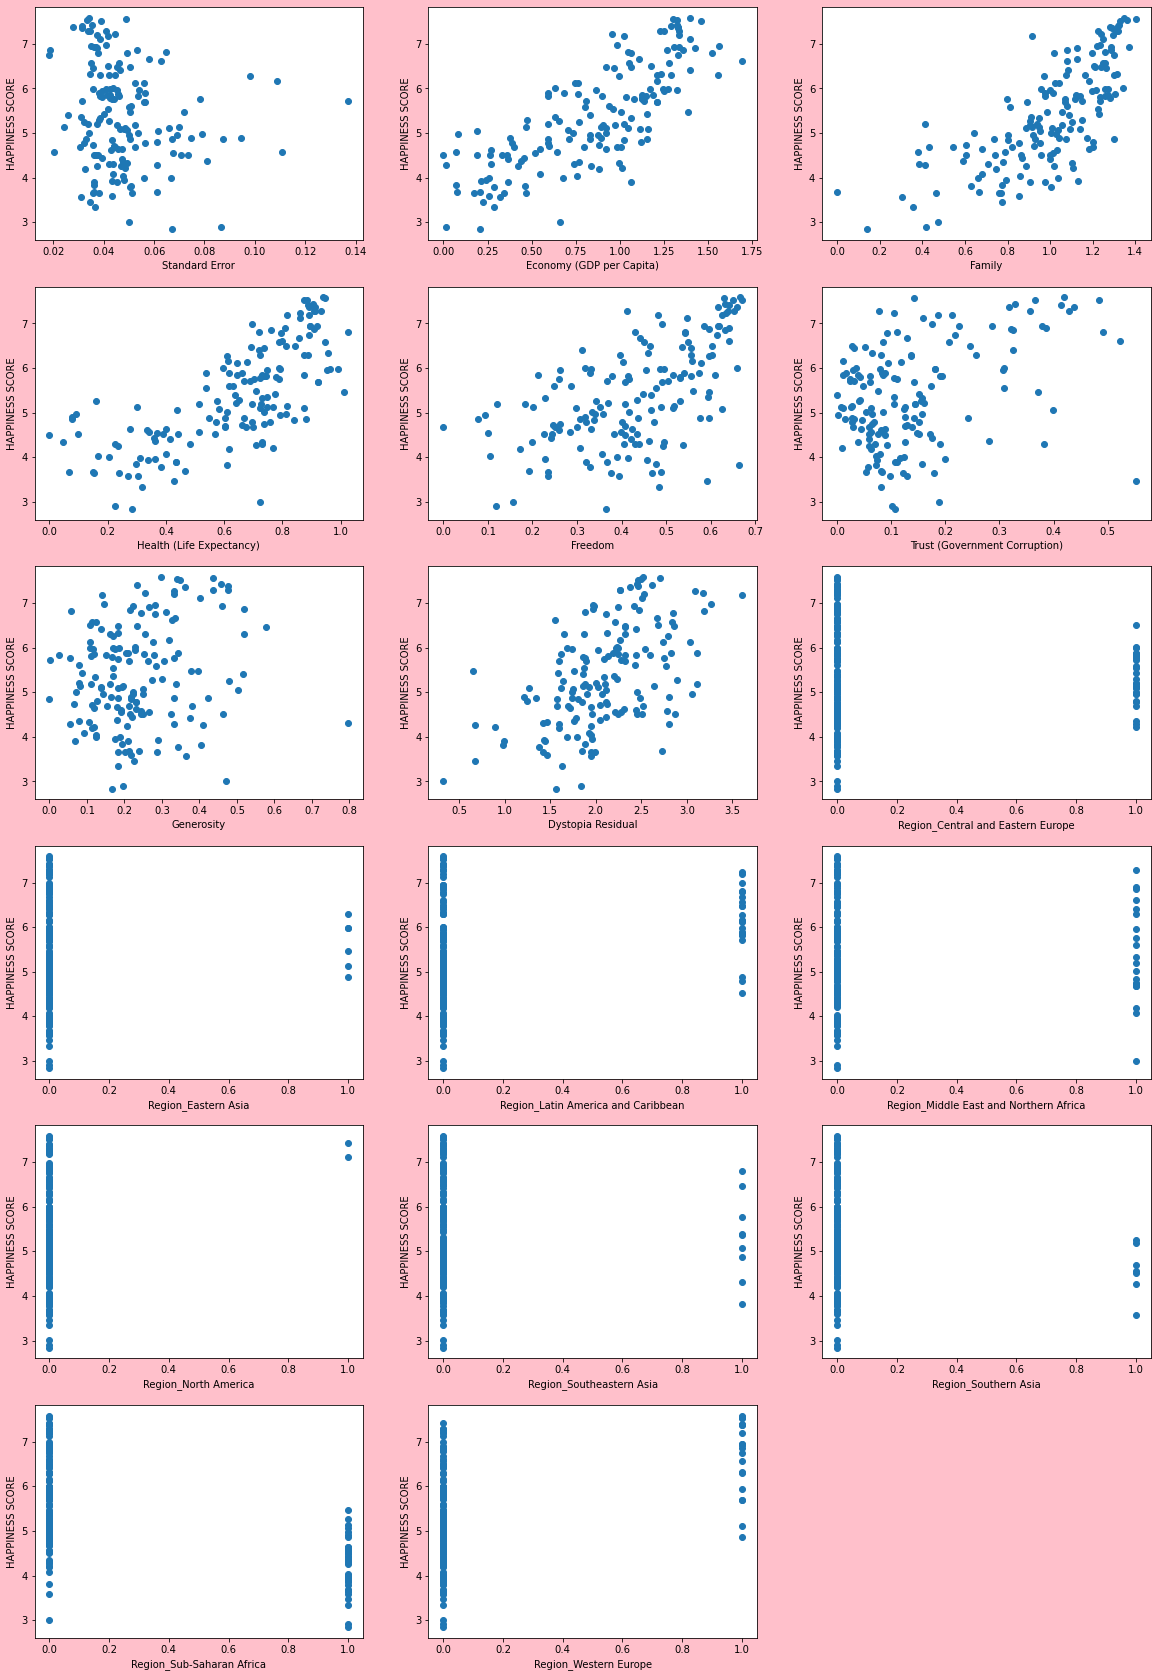

In [20]:
plt.figure(figsize=(20,30),facecolor='pink')
plotnumber=1

for column in x:
    if plotnumber <=17:
        ax=plt.subplot(6,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('HAPPINESS SCORE',fontsize=10)
    plotnumber+=1
plt.show()

Again, I do not see the need to drop any column, although 'Standard Error' shows less relation to Happiness Score

We will now scale our feature columns

In [21]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[-0.80592569,  1.36962124,  1.32028142, ..., -0.21530819,
        -0.58222251,  2.55417492],
       [ 0.05588945,  1.13522625,  1.51445776, ..., -0.21530819,
        -0.58222251,  2.55417492],
       [-0.8544869 ,  1.19286069,  1.36105403, ..., -0.21530819,
        -0.58222251,  2.55417492],
       ...,
       [ 0.13253425, -0.45524543, -1.90108634, ..., -0.21530819,
        -0.58222251, -0.39151586],
       [ 2.26396166, -2.06756644, -2.1184666 , ..., -0.21530819,
         1.7175564 , -0.39151586],
       [ 1.13418227, -1.58633379, -3.13472485, ..., -0.21530819,
         1.7175564 , -0.39151586]])

We can now begin our Model Training and Testing

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=69)

In [23]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {r2_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {r2_score(y_test,pred)*100:.2f}%')
        print('Cross Validation Score = ',cross_val_score(clf,x_scaled,y,cv=5).mean())
        print('MAE = ',mean_absolute_error(y_test,pred))
        print('MSE = ',mean_squared_error(y_test,pred))
        print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))

In [26]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 100.00%

 ======TESTING RESULT======
Accuracy Score: 100.00%
Cross Validation Score =  -2.527259492273168e+21
MAE =  0.00023367379213909412
MSE =  8.565470574573188e-08
RMSE =  0.0002926682520290369


We can note that we are getting training accuracy of 100% and Testing accuracy of 100% with Linear Regression model meaning our model is definetely overfitting

We should now test the data on other models as well to check which model is giving us the best result

In [27]:
knn = KNeighborsRegressor()
dec = DecisionTreeRegressor()
ran = RandomForestRegressor()
xgb = XGBRegressor()

In [28]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

Testing accuracies for other models

- Training Accuracies:

In [30]:
print(lr.score(x_train,y_train))
print(knn.score(x_train,y_train))
print(dec.score(x_train,y_train))
print(ran.score(x_train,y_train))
print(xgb.score(x_train,y_train))

0.9999999446151723
0.8714108239399464
1.0
0.9832168328052776
0.9999995783733377


- Testing Accuracies:

In [31]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.9999999355786814
0.7917357746178477
0.8162707769438935
0.9048344492172777
0.9346663165629554


From above we can note:
- Linear Regression, Decision Tree and XGB are massively overfitting
- KNN is giving decent accuracy for both Traing and Testing without overfitting
- Random Forest is also overfitting bet much lesser than others and can be used

Now we need to check for overfitting

I'll be using Ridge regularization for this

In [32]:
from sklearn.linear_model import Ridge, RidgeCV

In [33]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [34]:
ridgecv.alpha_

0.001

In [35]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [36]:
ridge_model.score(x_test,y_test)

0.9999999355238817

We can conclude the model is not overfitting as it is giving very similar score to Linear Regression R2 Score